In [1]:
%run ../prelude.py --style=uncompressed --animation=spacetime

interactive(children=(Dropdown(description='style', options=('tree', 'uncompressed', 'tree+uncompressed'), val…

Button(description='Run all cells below', style=ButtonStyle())

In [2]:
# Initial values

M = 6
N = 6
K = 6
density = [0.9, 0.8]
cutoff = 2
seed = 10

def set_params(rank_M, rank_N, rank_K, tensor_density, rand_seed):
    global M
    global N
    global K
    global density
    global seed
    
    M = rank_M
    N = rank_N
    K = rank_K
    
    if tensor_density == 'sparse':
        density = [0.9, 0.8]
    elif tensor_density == 'sparser':
        density = [0.9, 0.4]
    else:
        density = [1.0, 1.0]
        
    seed = rand_seed

w = interactive(set_params,
             rank_M=widgets.IntSlider(min=2, max=10, step=1, value=M),
             rank_N=widgets.IntSlider(min=2, max=10, step=1, value=N),
             rank_K=widgets.IntSlider(min=2, max=10, step=1, value=K),
             tensor_density=['sparse', 'sparser', 'dense'],
             rand_seed=widgets.IntSlider(min=0, max=100, step=1, value=seed))

display(w)

createRunallButton()


interactive(children=(IntSlider(value=6, description='rank_M', max=10, min=2), IntSlider(value=6, description=…

Button(description='Run all cells below', style=ButtonStyle())

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## Create Input Tensors



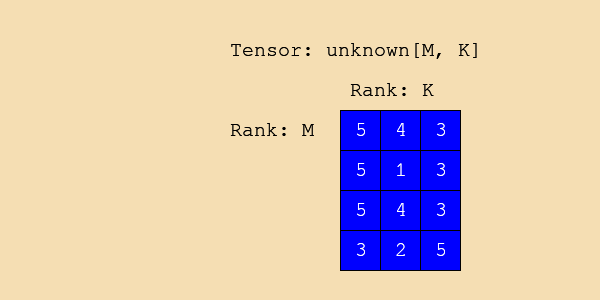

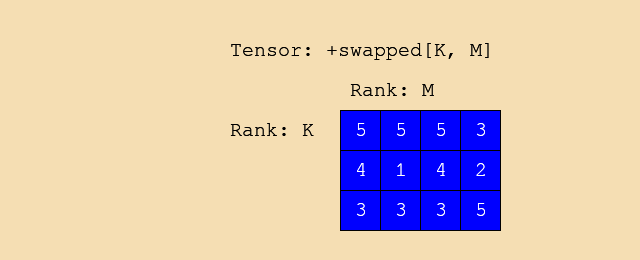

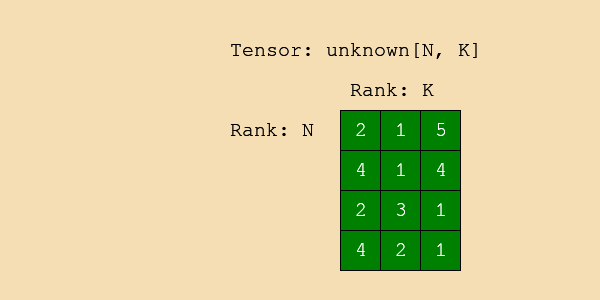

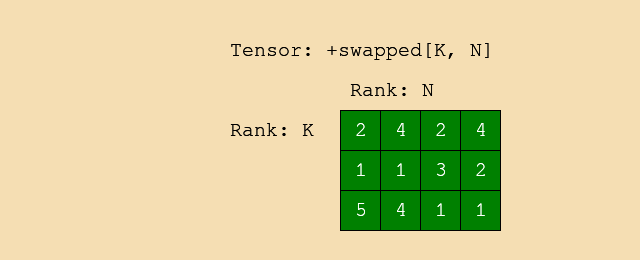

In [24]:
a = Tensor.fromRandom(["M", "K"], [M, K], density, 5, seed=seed)
#a.setName("A")
a.setColor("blue")
displayTensor(a)

# Create swapped rank version of a
a_swapped = a.swapRanks()
#a_swapped.setName("A_swapped")
displayTensor(a_swapped)

b = Tensor.fromRandom(["N", "K"], [N, K], density, 5, seed=2*seed)
#b.setName("B")
b.setColor("green")
displayTensor(b)

# Create swapped rank version of b
b_swapped = b.swapRanks()
#b_swapped.setName("B_swapped")
displayTensor(b_swapped)



## Create reference output

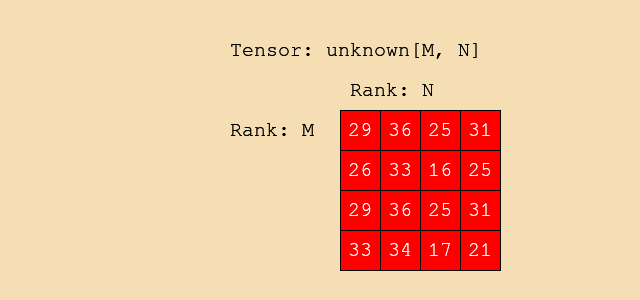

In [25]:
z_validate = Tensor(rank_ids=["M", "N"], shape=[M, N])

a_m = a.getRoot()
b_n = b.getRoot()
z_m = z_validate.getRoot()

for m, (z_n, a_k) in z_m << a_m:
    for n, (z_ref, b_k) in z_n << b_n:
        for k, (a_val, b_val) in a_k & b_k:
            z_ref += a_val * b_val

displayTensor(z_validate)



def compareZ(z):
    
    n = 0
    total = 0
    
    z1 = z_validate.getRoot()
    z2 = z.getRoot()
    
    for m, (ab_n, z1_n, z2_n) in z1 | z2:
        for n, (ab_val, z1_val, z2_val) in z1_n | z2_n:
            # Unpack the values to use abs (arggh)
            z1_val = Payload.get(z1_val)
            z2_val = Payload.get(z2_val)
         
            n += 1
            total += abs(z1_val-z2_val)

    return total/n
        

## Pruning function


In [26]:
class ThresholdPrune():
    def __init__(self, threshold=2):
        
        self.threshold = threshold
        
    def __call__(self, n, c, p):
        
        size = p.countValues()
        result = size > self.threshold
        
        print(f"Preserve = {result}")
        
        return result
    
    


## Output Stationary/Inner Product

Preserve = True
Preserve = True
Preserve = True
Preserve = True
Error = 0.0


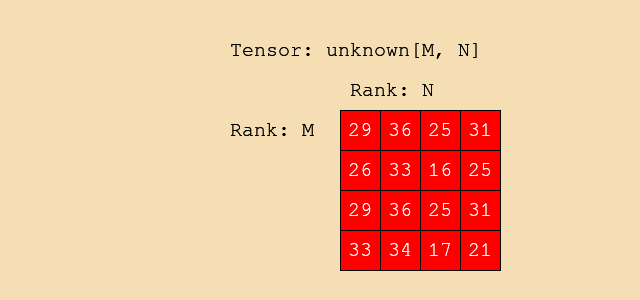

Point to position mapping:  {(0, 0): 0, (0, 1): 1, (0, 2): 2, (1, 0): 3, (1, 1): 4, (1, 2): 5, (2, 0): 6, (2, 1): 7, (2, 2): 8, (3, 0): 9, (3, 1): 10, (3, 2): 11}
Point to position mapping:  {(0, 0): 0, (0, 1): 1, (0, 2): 2, (1, 0): 3, (1, 1): 4, (1, 2): 5, (2, 0): 6, (2, 1): 7, (2, 2): 8, (3, 0): 9, (3, 1): 10, (3, 2): 11}
Point to position mapping:  {(0, 0): 0, (0, 1): 1, (0, 2): 2, (0, 3): 3, (1, 0): 4, (1, 1): 5, (1, 2): 6, (1, 3): 7, (2, 0): 8, (2, 1): 9, (2, 2): 10, (2, 3): 11, (3, 0): 12, (3, 1): 13, (3, 2): 14, (3, 3): 15}


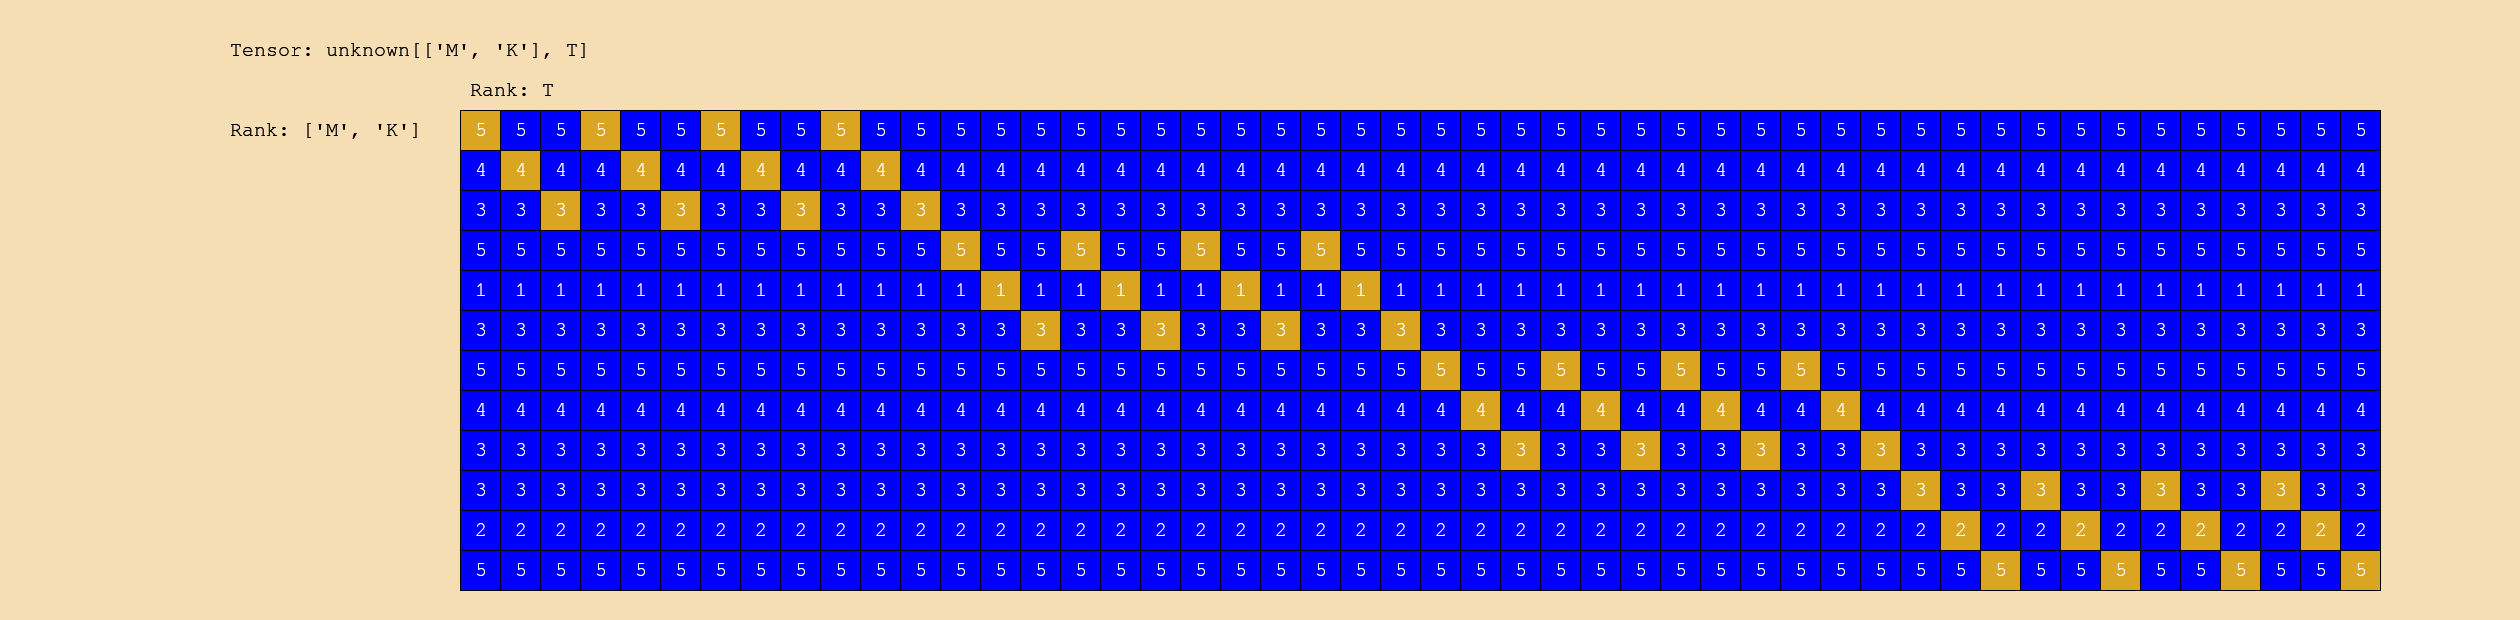

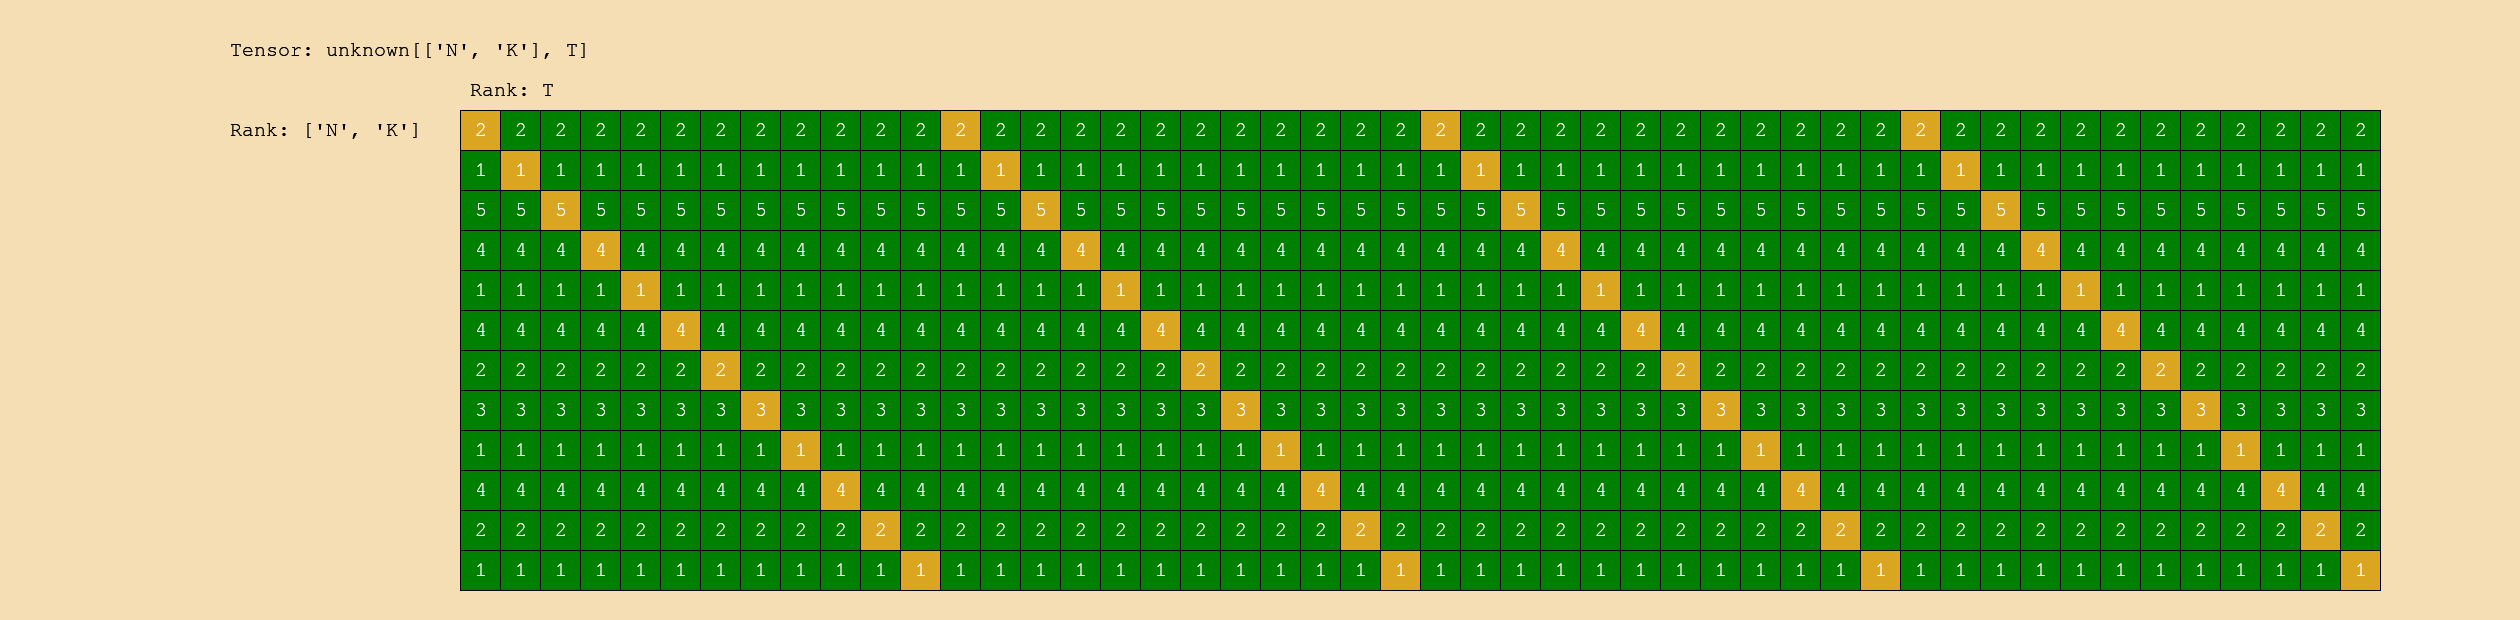

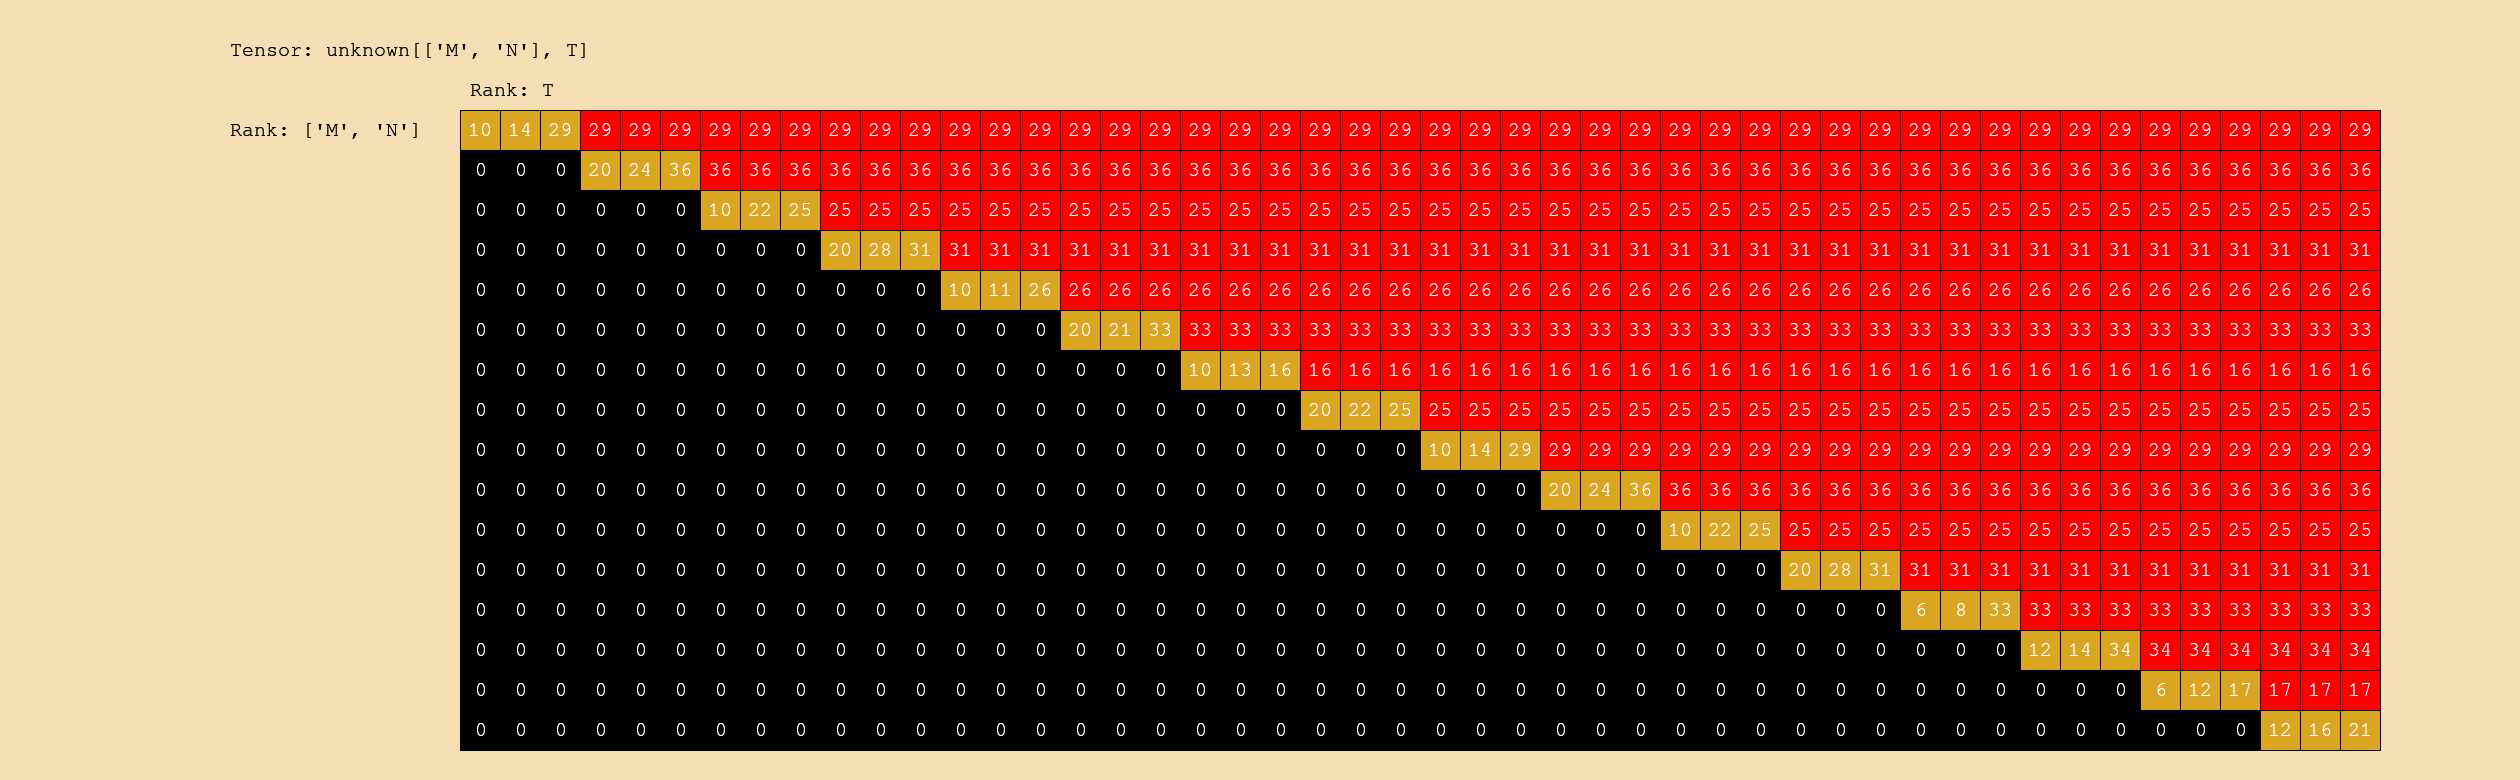

In [27]:
z = Tensor(rank_ids=["M", "N"], shape=[M, N])

under_threshold = ThresholdPrune(cutoff)

a_m = a.getRoot()
b_n = b.getRoot()
z_m = z.getRoot()

canvas = createCanvas(a, b, z)

for m, (z_n, a_k) in z_m << a_m.prune(under_threshold):
    for n, (z_ref, b_k) in z_n << b_n:
        for k, (a_val, b_val) in a_k & b_k:
            z_ref += a_val * b_val
            addFrame(canvas, (m, k), (n, k), (m, n))

print(f"Error = {compareZ(z)}")

displayTensor(z)
displayCanvas(canvas)

## A stationary - row major/Gustavson

Error = 0.0


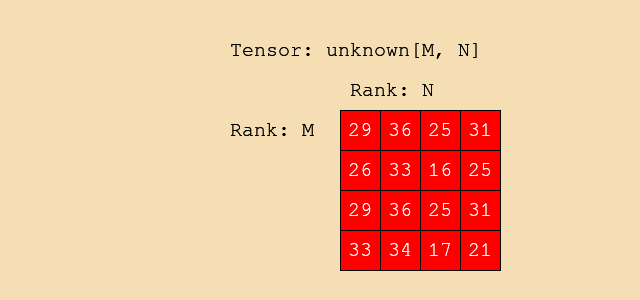

Point to position mapping:  {(0, 0): 0, (0, 1): 1, (0, 2): 2, (1, 0): 3, (1, 1): 4, (1, 2): 5, (2, 0): 6, (2, 1): 7, (2, 2): 8, (3, 0): 9, (3, 1): 10, (3, 2): 11}
Point to position mapping:  {(0, 0): 0, (0, 1): 1, (0, 2): 2, (0, 3): 3, (1, 0): 4, (1, 1): 5, (1, 2): 6, (1, 3): 7, (2, 0): 8, (2, 1): 9, (2, 2): 10, (2, 3): 11}
Point to position mapping:  {(0, 0): 0, (0, 1): 1, (0, 2): 2, (0, 3): 3, (1, 0): 4, (1, 1): 5, (1, 2): 6, (1, 3): 7, (2, 0): 8, (2, 1): 9, (2, 2): 10, (2, 3): 11, (3, 0): 12, (3, 1): 13, (3, 2): 14, (3, 3): 15}


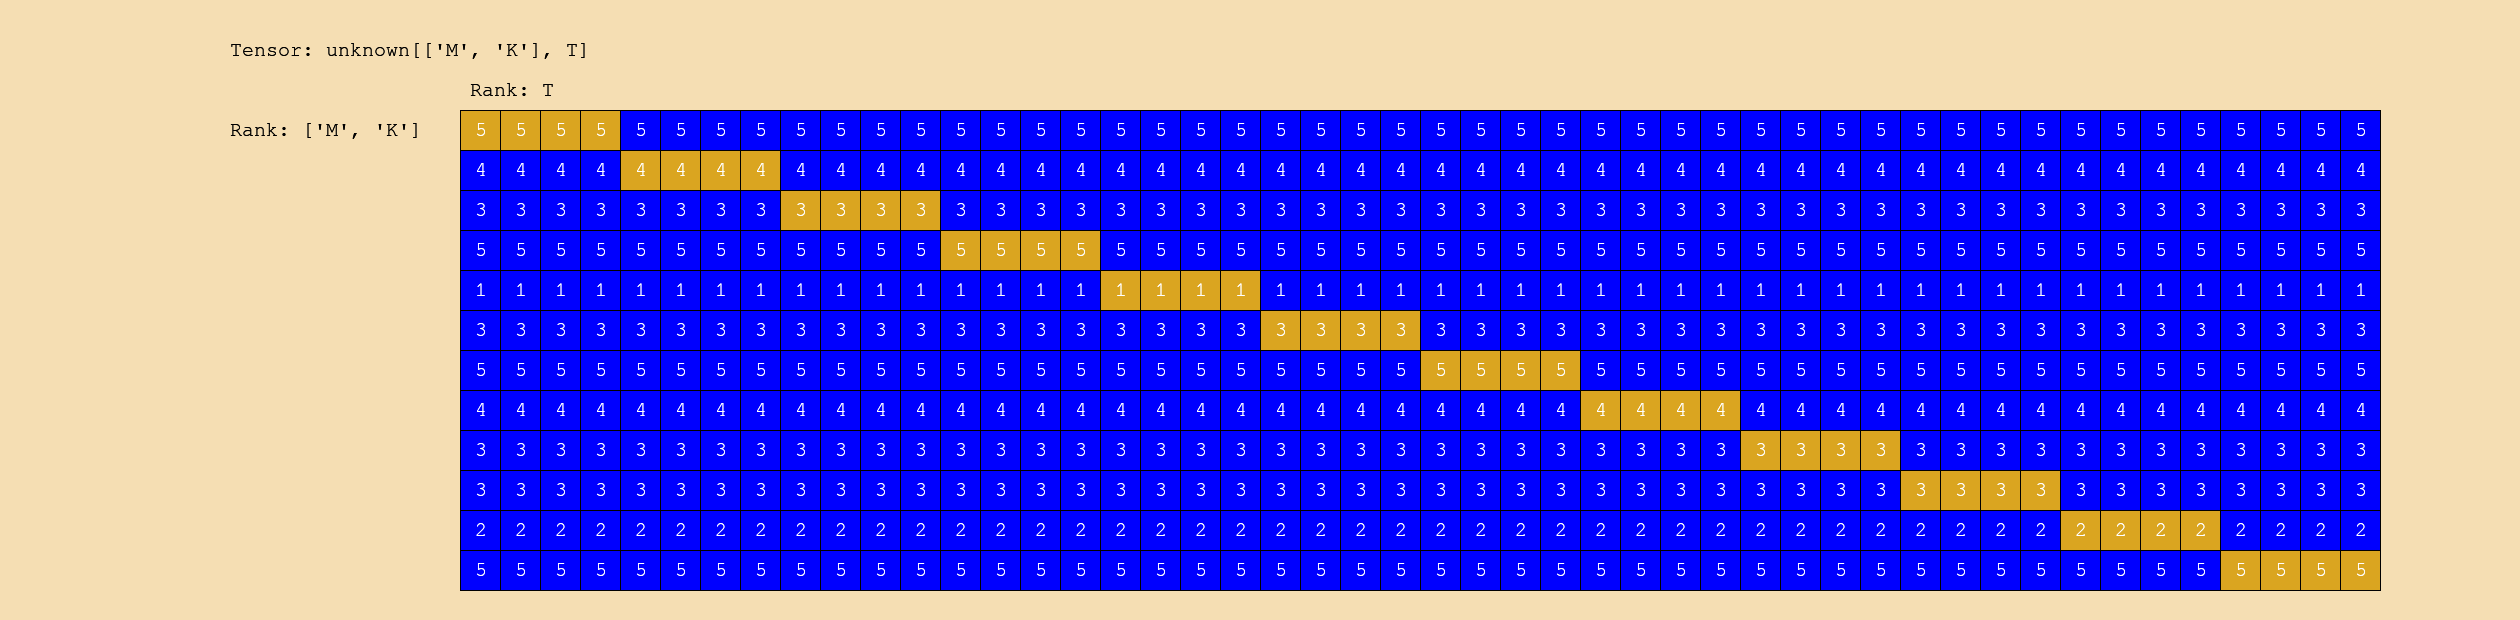

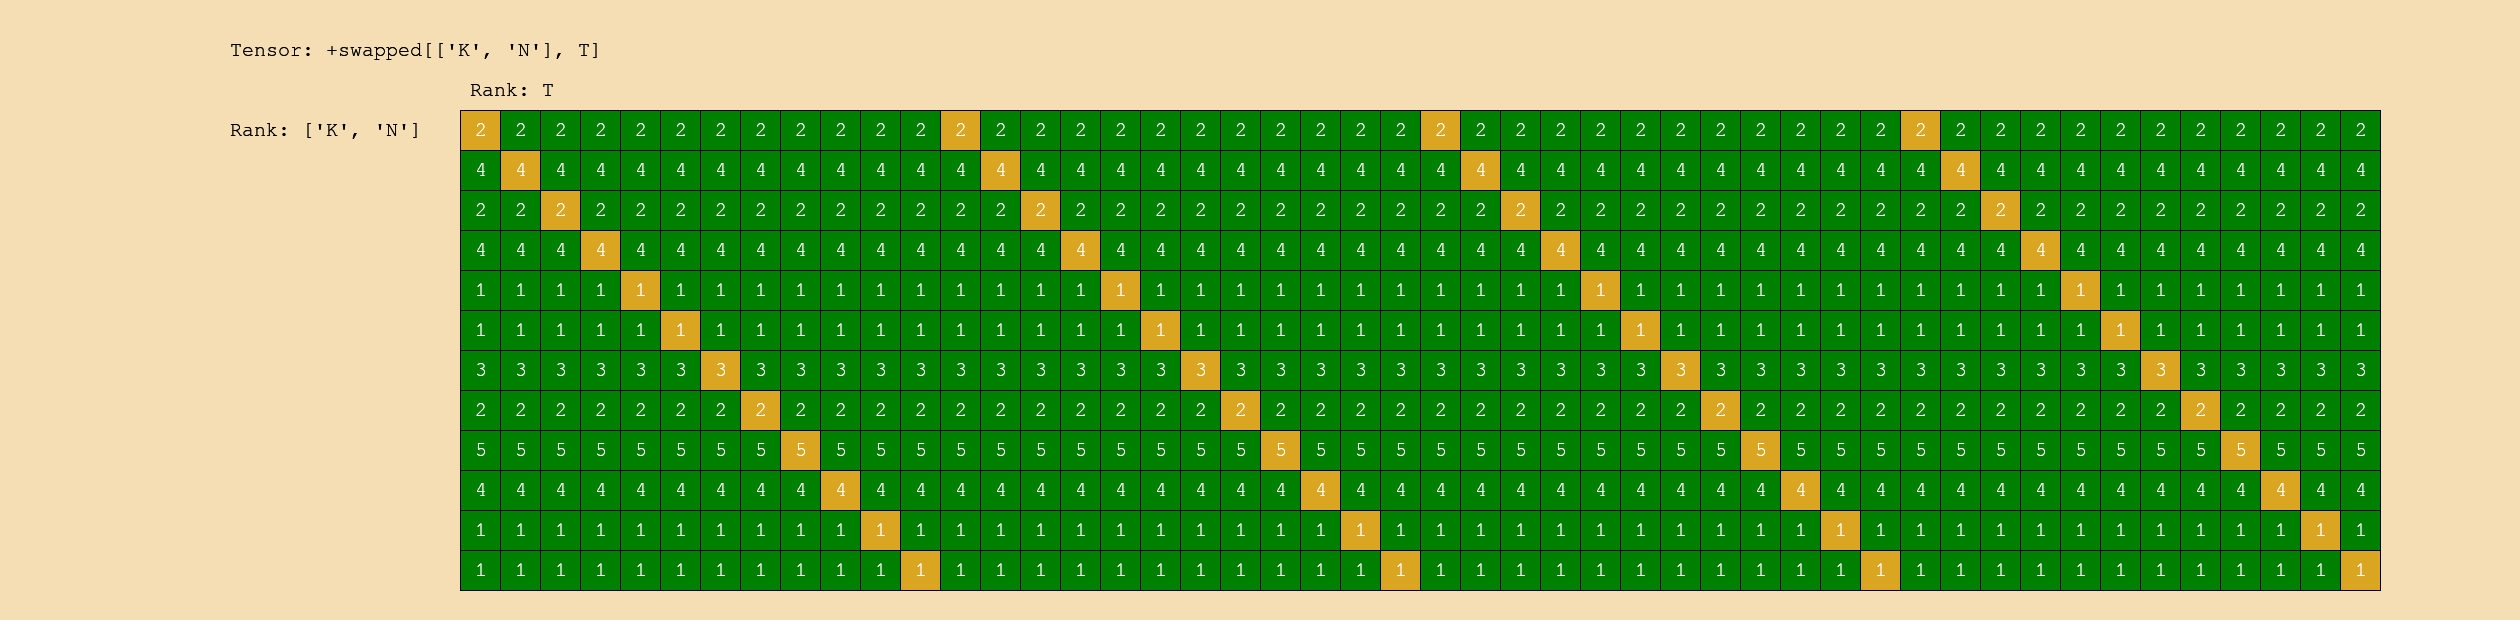

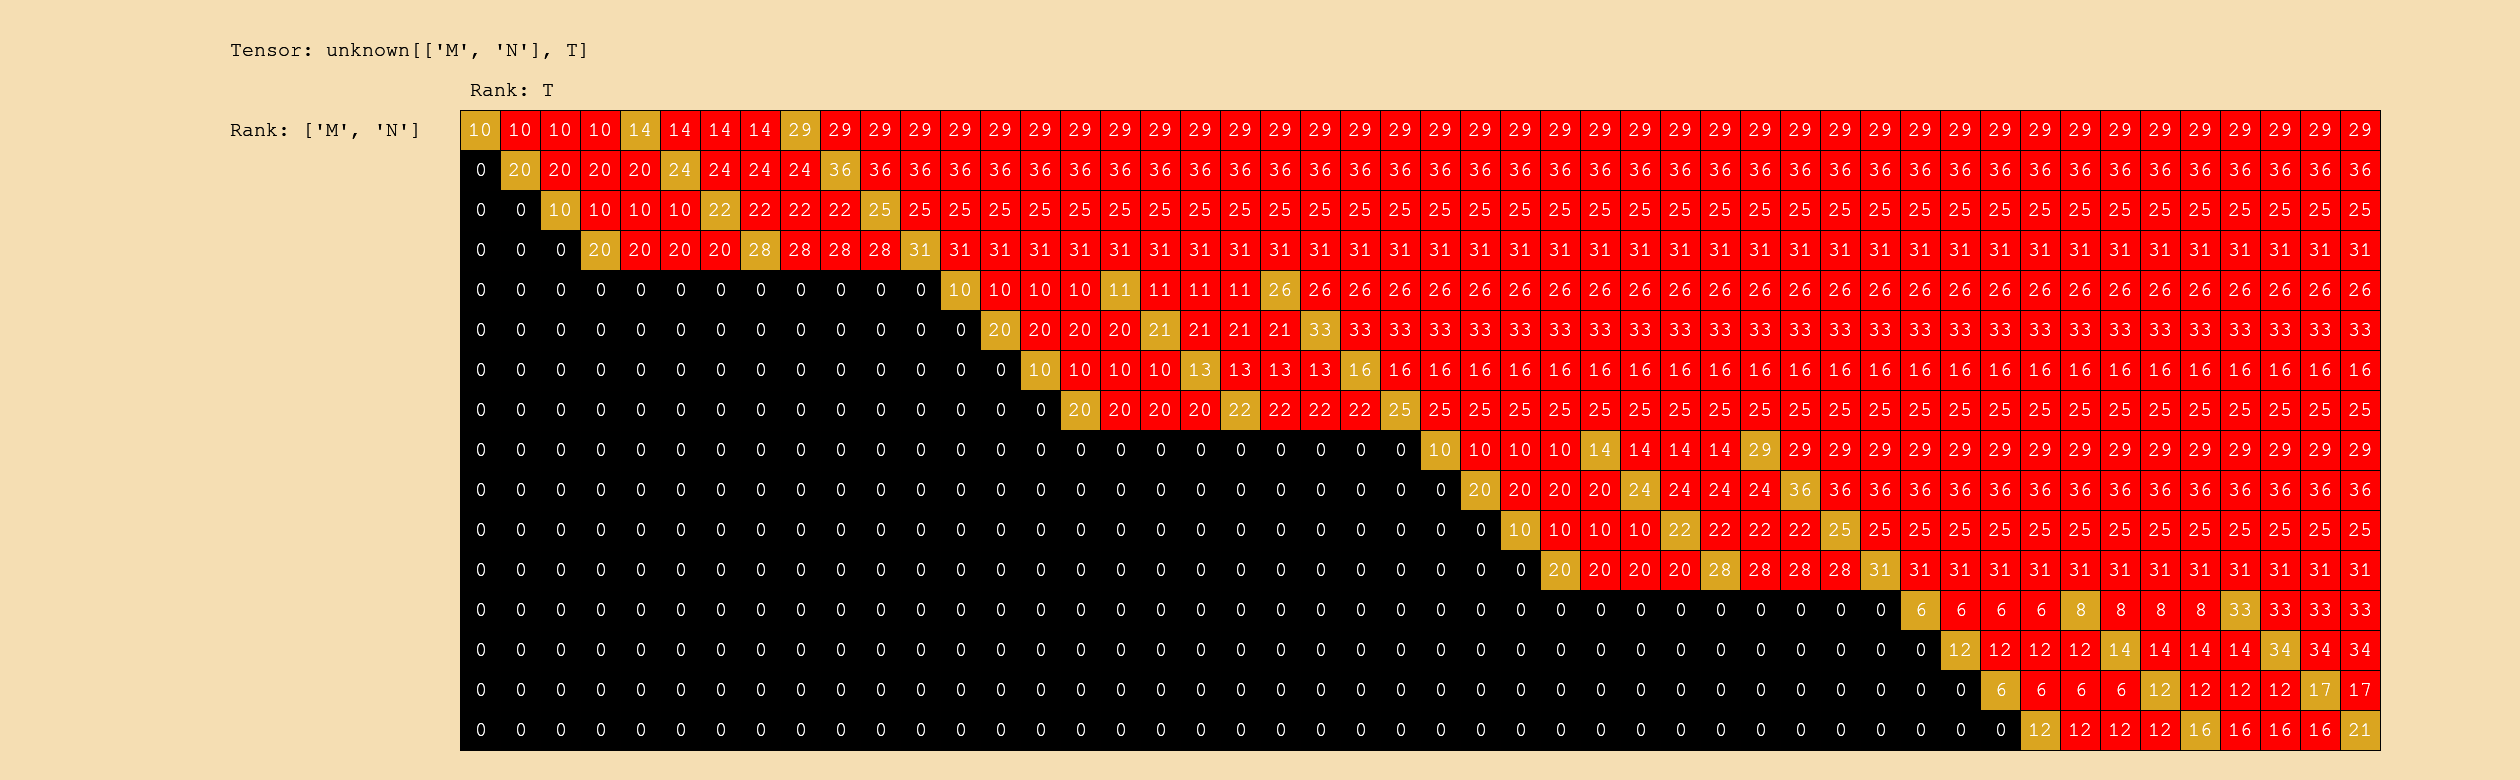

In [28]:
z = Tensor(rank_ids=["M", "N"], shape=[M, N])

under_threshold = ThresholdPrune(cutoff)

a_m = a.getRoot()
b_k = b_swapped.getRoot()
z_m = z.getRoot()

canvas = createCanvas(a, b_swapped, z)

for m, (z_n, a_k) in z_m << a_m:
    for k, (a_val, b_n) in a_k & b_k:
        for n, (z_ref, b_val) in z_n << b_n:
            z_ref += a_val * b_val
            addFrame(canvas, (m, k), (k, n), (m, n))

print(f"Error = {compareZ(z)}")

displayTensor(z)
displayCanvas(canvas)

## A stationary - column major/Outer Product

Preserve = True
Preserve = True
Preserve = True
Error = 0.0


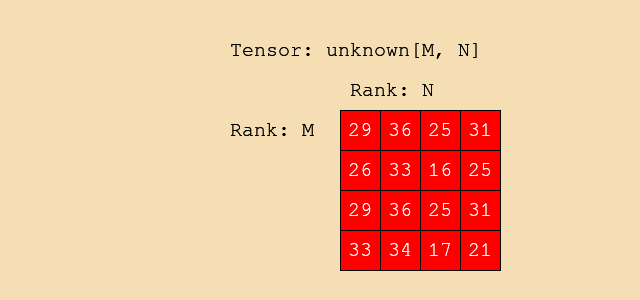

Point to position mapping:  {(0, 0): 0, (0, 1): 1, (0, 2): 2, (1, 0): 3, (1, 1): 4, (1, 2): 5, (2, 0): 6, (2, 1): 7, (2, 2): 8, (3, 0): 9, (3, 1): 10, (3, 2): 11}
Point to position mapping:  {(0, 0): 0, (0, 1): 1, (0, 2): 2, (0, 3): 3, (1, 0): 4, (1, 1): 5, (1, 2): 6, (1, 3): 7, (2, 0): 8, (2, 1): 9, (2, 2): 10, (2, 3): 11}
Point to position mapping:  {(0, 0): 0, (0, 1): 1, (0, 2): 2, (0, 3): 3, (1, 0): 4, (1, 1): 5, (1, 2): 6, (1, 3): 7, (2, 0): 8, (2, 1): 9, (2, 2): 10, (2, 3): 11, (3, 0): 12, (3, 1): 13, (3, 2): 14, (3, 3): 15}


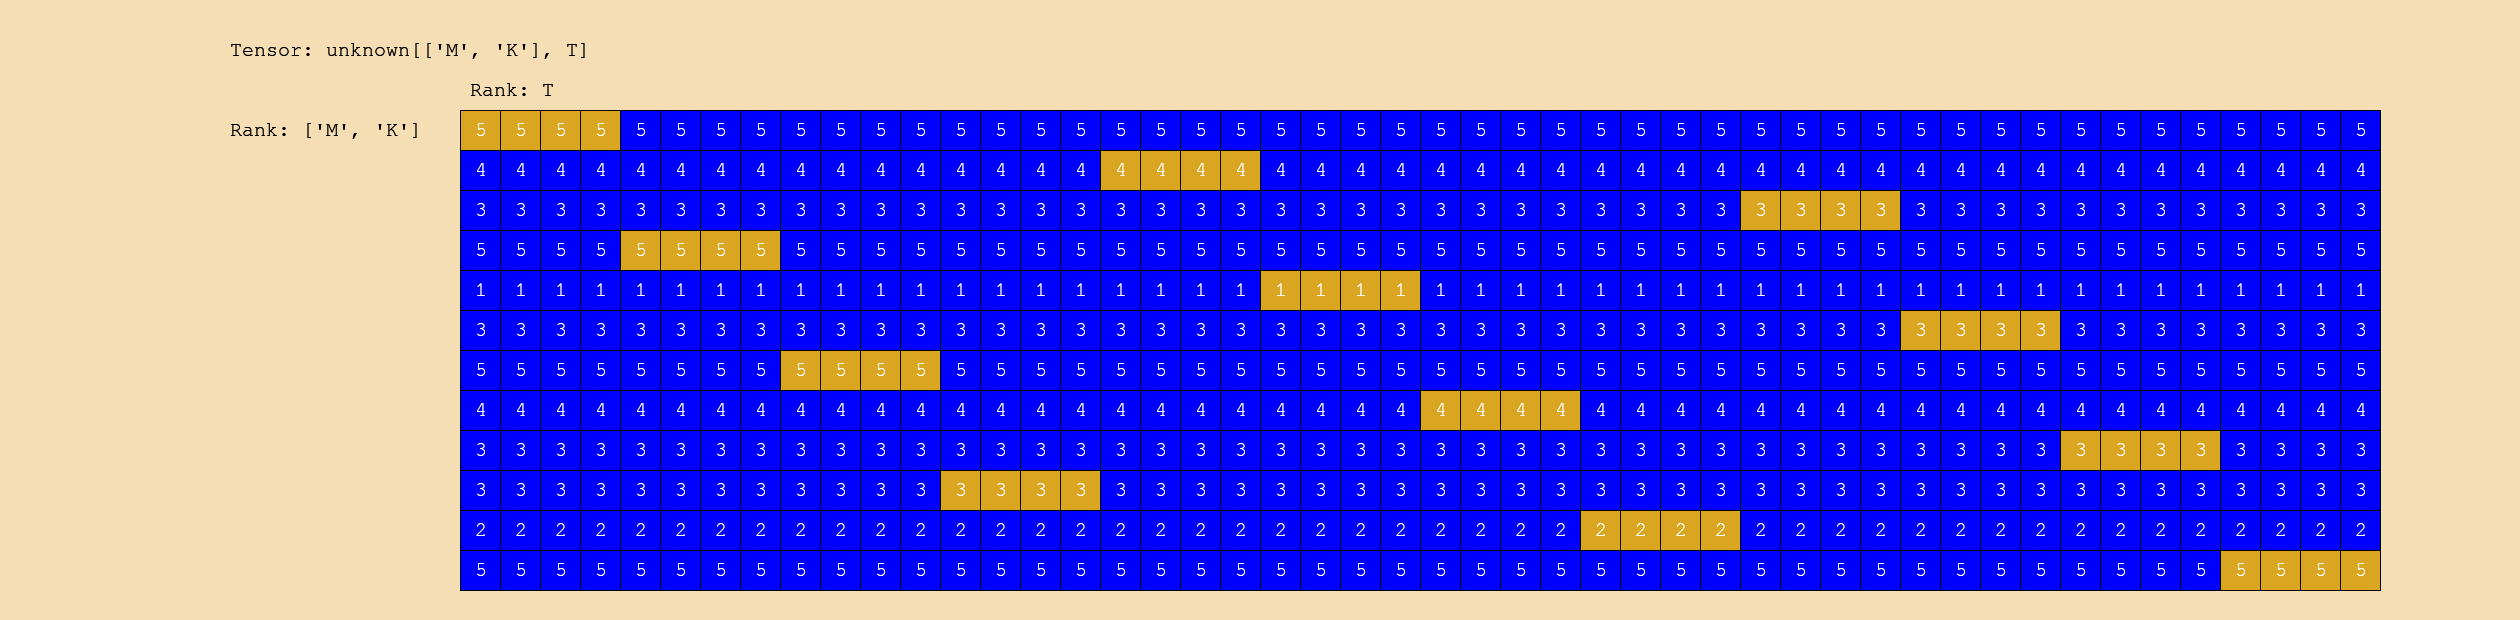

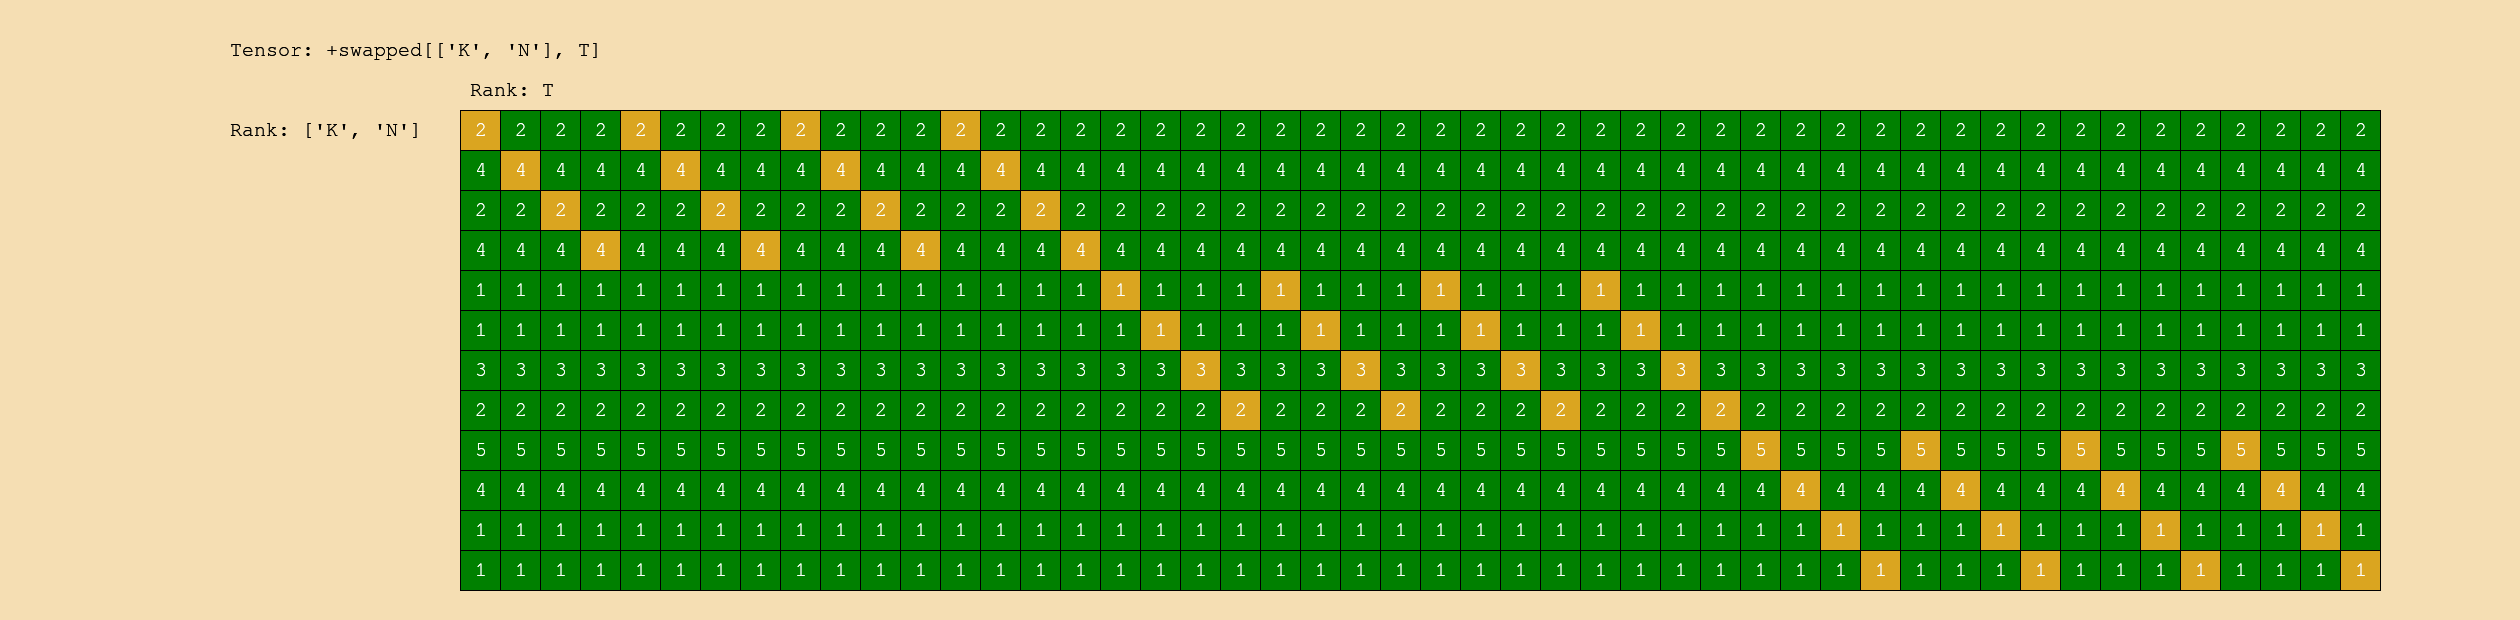

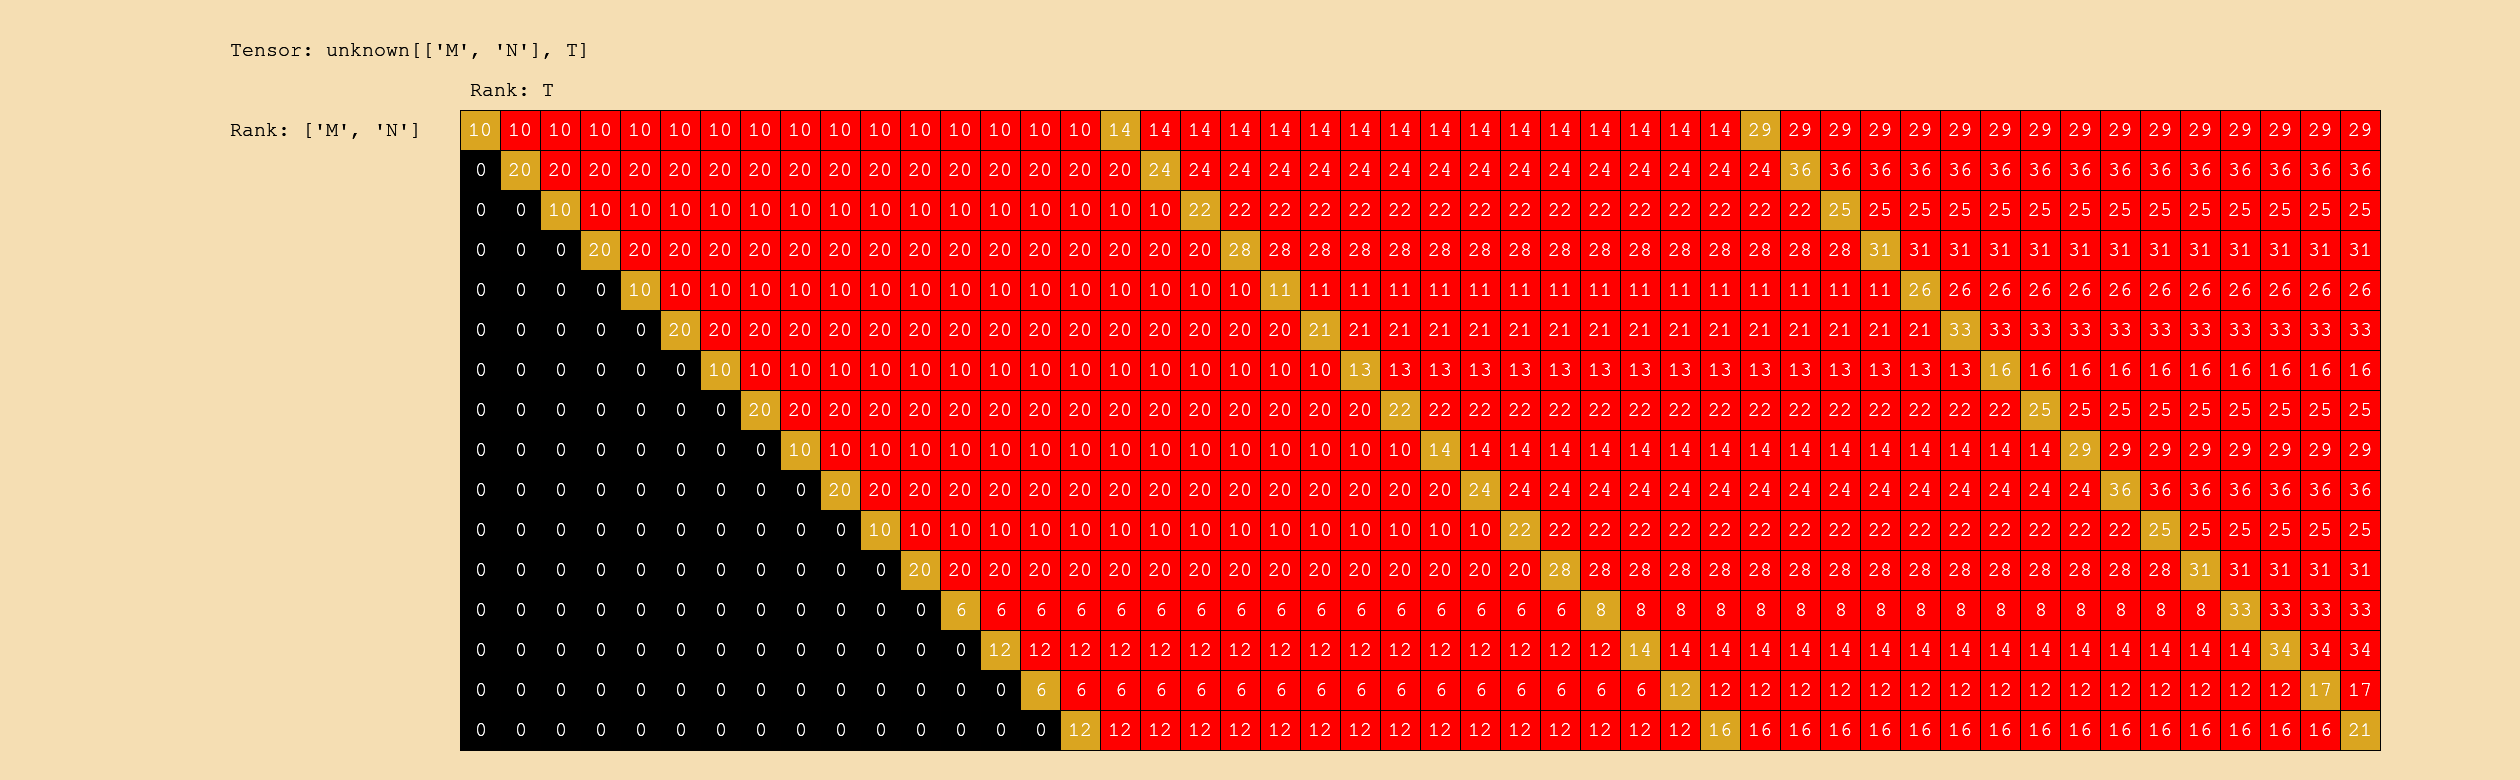

In [29]:
z = Tensor(rank_ids=["M", "N"], shape=[M, N])

under_threshold = ThresholdPrune(cutoff)

a_k = a_swapped.getRoot()
b_k = b_swapped.getRoot()
z_m = z.getRoot()


canvas = createCanvas(a, b_swapped, z)

for k, (a_m, b_n) in a_k & b_k.prune(under_threshold):
    for m, (z_n, a_val) in z_m << a_m:
        for n, (z_ref, b_val) in z_n << b_n:
            z_ref += a_val * b_val
            addFrame(canvas, (m, k), (k, n), (m, n))

print(f"Error = {compareZ(z)}")

displayTensor(z)
displayCanvas(canvas)